For speed=85 km/h and throttle=40%, recommended gear: 3


/opt/anaconda3/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


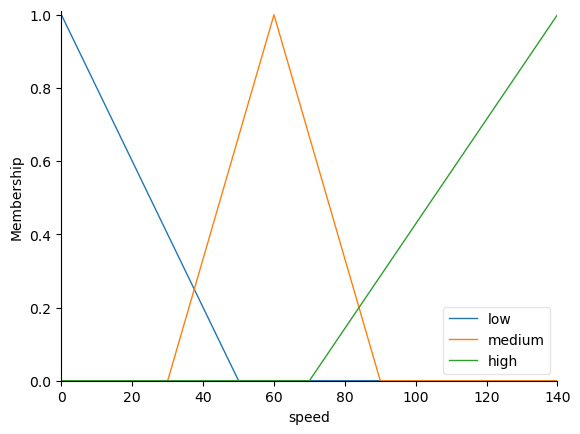

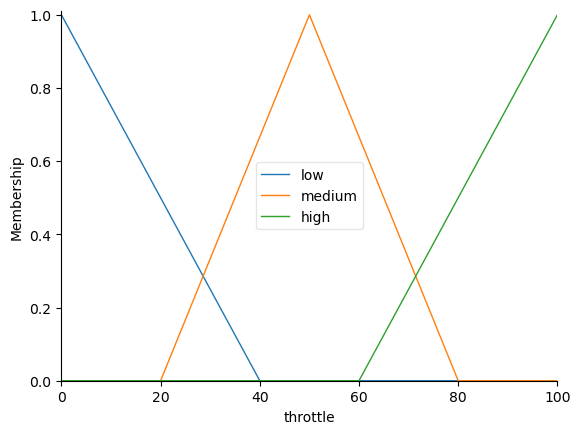

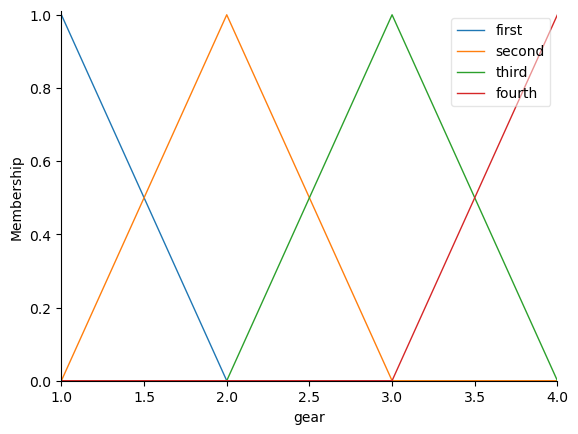

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
speed = ctrl.Antecedent(np.arange(0, 141, 1), 'speed')         # 0-140 km/h
throttle = ctrl.Antecedent(np.arange(0, 101, 1), 'throttle')   # 0-100 percent
gear = ctrl.Consequent(np.arange(1, 5, 1), 'gear')             # Gears 1-4

# Membership functions for speed
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [30, 60, 90])
speed['high'] = fuzz.trimf(speed.universe, [70, 140, 140])

# Membership functions for throttle
throttle['low'] = fuzz.trimf(throttle.universe, [0, 0, 40])
throttle['medium'] = fuzz.trimf(throttle.universe, [20, 50, 80])
throttle['high'] = fuzz.trimf(throttle.universe, [60, 100, 100])

# Membership functions for gear
gear['first'] = fuzz.trimf(gear.universe, [1, 1, 2])
gear['second'] = fuzz.trimf(gear.universe, [1, 2, 3])
gear['third'] = fuzz.trimf(gear.universe, [2, 3, 4])
gear['fourth'] = fuzz.trimf(gear.universe, [3, 4, 4])

# Define fuzzy rules
rule1 = ctrl.Rule(speed['low'] & throttle['low'], gear['first'])
rule2 = ctrl.Rule(speed['low'] & throttle['medium'], gear['first'])
rule3 = ctrl.Rule(speed['low'] & throttle['high'], gear['second'])

rule4 = ctrl.Rule(speed['medium'] & throttle['low'], gear['second'])
rule5 = ctrl.Rule(speed['medium'] & throttle['medium'], gear['second'])
rule6 = ctrl.Rule(speed['medium'] & throttle['high'], gear['third'])

rule7 = ctrl.Rule(speed['high'] & throttle['low'], gear['third'])
rule8 = ctrl.Rule(speed['high'] & throttle['medium'], gear['third'])
rule9 = ctrl.Rule(speed['high'] & throttle['high'], gear['fourth'])

# Create control system
transmission_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
transmission = ctrl.ControlSystemSimulation(transmission_ctrl)

# Example input
test_speed = 85   # km/h
test_throttle = 40  # percent

transmission.input['speed'] = test_speed
transmission.input['throttle'] = test_throttle
transmission.compute()

print(f"For speed={test_speed} km/h and throttle={test_throttle}%, recommended gear: {round(transmission.output['gear'])}")

# Plot membership functions (optional visualization)
speed.view()
throttle.view()
gear.view()
plt.show()